# Data Preparation

In [ ]:
# dataset: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

import glob # search files
from PIL import Image # display images
import random
import os, shutil, pathlib
import gc

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

import keras
from keras import backend as K

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True) 

import seaborn as sns
import cv2
from tqdm import tqdm

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
# Set path to the data 
base_dir = pathlib.Path("drive/MyDrive/WUM/flowers") 

# Display all the class names
print(os.listdir(base_dir))

['rose', 'daisy', 'tulip', 'dandelion', 'sunflower']


filename:drive/MyDrive/WUM/flowers/daisy/2365428551_39f83f10bf_n.jpg, size:(320, 240)


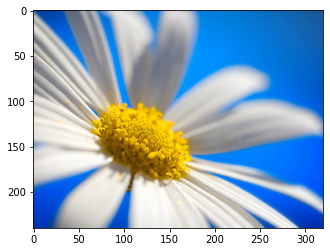

In [ ]:
# Retrive a list of all the images
images = glob.glob("drive/MyDrive/WUM/flowers/*/*.jpg")

# Disply an image
image_sample = images[1000]
img = Image.open(image_sample)
print('filename:{}, size:{}'.format(image_sample, img.size))
plt.imshow(img)
plt.show()

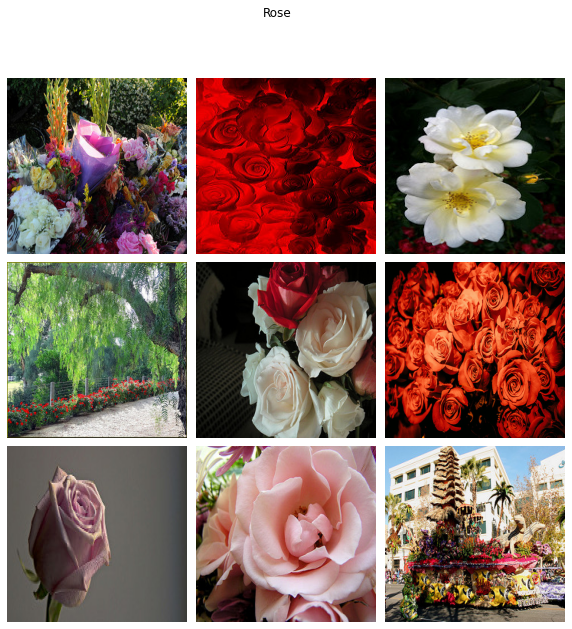

In [ ]:
# Show the first 9 images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i, ax in enumerate(axes.flat, start=0):
  image_sample = images[i]
  img = Image.open(image_sample)
  row = i // 3
  col = i % 3
  axes[row, col].axis("off")
  axes[row, col].imshow(img, aspect="auto")
plt.subplots_adjust(wspace=.05, hspace=.05)
plt.suptitle('Rose')
plt.show()

In [ ]:
# Check the size of image size
img_width = []
img_height = []
  
for i in range(len(images)):
  image_sample = images[i]
  img = Image.open(image_sample)
  img_width.append(img.width) 
  img_height.append(img.height) 

print(img_width[0], img_height[0])

320 231


In [ ]:
# Compute the average size of images
def resize(lst):
    avg = sum(lst) / len(lst)
    resized = avg * 0.3 # multiply 0.3 -> Average size is too big and colab keeps crashing when splitting the dataset
    return int(round(resized, 0))

#img_avg_width = avg(img_width)
#img_avg_height = avg(img_height)

#print("avg_width", img_avg_width) # 338 
#print("avg_height", img_avg_height) # 253 

resized_width = resize(img_width)
resized_height = resize(img_height)

print("resized_width", resized_width) # 102
print("resized_height", resized_height) # 76 

# free up some memory
del img_width
del img_height

resized_width 102
resized_height 76


In [ ]:
Daisy = base_dir/"daisy"
Sunflower = base_dir/"sunflower"
Tulip = base_dir/"tulip"
Dandelion = base_dir/"dandelion"
Rose = base_dir/"rose"

In [ ]:
img_data = [] 
labels = [] 

def generate_dataset(images, dir_name, image_dimension, label):
  for i in tqdm(os.listdir(dir_name)):
    path = os.path.join(dir_name, i)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, image_dimension)
    img_data.append(img)
    labels.append(label)


In [ ]:
generate_dataset(os.listdir(Daisy), Daisy, (resized_width, resized_height), 'Daisy')
generate_dataset(os.listdir(Sunflower), Sunflower, (resized_width, resized_height), 'Sunflower')
generate_dataset(os.listdir(Tulip), Tulip, (resized_width, resized_height), 'Tulip')
generate_dataset(os.listdir(Dandelion), Dandelion, (resized_width, resized_height), 'Dandeliion')
generate_dataset(os.listdir(Rose), Rose, (resized_width, resized_height), 'Rose')

print("\nTotal number of images: ", len(img_data))

100%|██████████| 784/784 [00:05<00:00, 144.11it/s]


Total number of images:  4317


4317


Text(0.5, 1.0, 'Dandeliion')

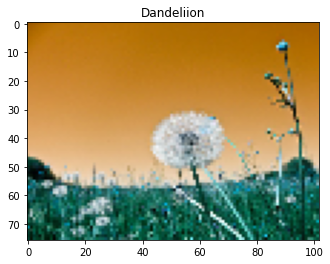

In [ ]:
# Display a resized image
random_idx = random.randint(0, len(labels))
print(len(labels))
imgplot = plt.imshow(img_data[random_idx])
plt.title(labels[random_idx])

In [ ]:
# Encode target labels with value between 0 and n_classes-1
le = LabelEncoder() 
Y = le.fit_transform(labels)

# Converts a class vector (integers) to binary class matrix
Y = to_categorical(Y, 5) 

X = np.array(img_data)

# Normalize the color values (0-255) to the range 0 to 1 to reduce the complexity of computation values
X = X/255  

In [ ]:
np.random.seed(123)
random.seed(123)

# train:test = 4:1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (3453, 76, 102, 3)
X_test:  (864, 76, 102, 3)
Y_train:  (3453, 5)
Y_test:  (864, 5)


In [ ]:
# train:val = 4:1
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1) 

print("X_train: ", X_train.shape) # 64%
print("X_test: ", X_test.shape) # 20%
print("X_val: ", X_val.shape) # 16%
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)
print("Y_val: ", Y_val.shape)

X_train:  (2762, 76, 102, 3)
X_test:  (864, 76, 102, 3)
X_val:  (691, 76, 102, 3)
Y_train:  (2762, 5)
Y_test:  (864, 5)
Y_val:  (691, 5)


In [ ]:
collected = gc.collect()

# Baseline Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(resized_height, resized_width, 3)) # input shape: height * width * color channel
#rescale = layers.Rescaling(1./255.0, offset=0.0)(inputs)

dense1 = layers.Dense(256, activation="relu")(inputs)
dropout1 = layers.Dropout(0.5)(dense1)

dense2 = layers.Dense(128, activation="relu")(dropout1)
dropout2 = layers.Dropout(0.5)(dense2)

dense3 = layers.Dense(64, activation="relu")(dropout2)
flatten = x = layers.Flatten()(dense3) 

outputs = layers.Dense(5, activation="softmax")(flatten) 

# Connect the input and output in the model class
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 76, 102, 3)]      0         
                                                                 
 dense_17 (Dense)            (None, 76, 102, 256)      1024      
                                                                 
 dropout_16 (Dropout)        (None, 76, 102, 256)      0         
                                                                 
 dense_18 (Dense)            (None, 76, 102, 128)      32896     
                                                                 
 dropout_17 (Dropout)        (None, 76, 102, 128)      0         
                                                                 
 dense_19 (Dense)            (None, 76, 102, 64)       8256      
                                                                 
 flatten_8 (Flatten)         (None, 496128)            0   

In [ ]:
collected = gc.collect()

batch_size = 128

model.compile(
    optimizer = "adam", 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])

# Start training
history = model.fit(
    X_train, 
    Y_train, 
    epochs=5,
    validation_data= (X_val, Y_val))

Epoch 1/5
87/87 [==============================] - 253s 3s/step - loss: 2.0060 - accuracy: 0.3345 - val_loss: 1.3558 - val_accuracy: 0.4182
Epoch 2/5
87/87 [==============================] - 253s 3s/step - loss: 1.1783 - accuracy: 0.5062 - val_loss: 1.2751 - val_accuracy: 0.4805
Epoch 3/5
87/87 [==============================] - 244s 3s/step - loss: 1.0864 - accuracy: 0.5677 - val_loss: 1.2299 - val_accuracy: 0.4718
Epoch 4/5
87/87 [==============================] - 243s 3s/step - loss: 1.0103 - accuracy: 0.6101 - val_loss: 1.2233 - val_accuracy: 0.4920
Epoch 5/5
87/87 [==============================] - 244s 3s/step - loss: 0.9424 - accuracy: 0.6408 - val_loss: 1.2545 - val_accuracy: 0.4964


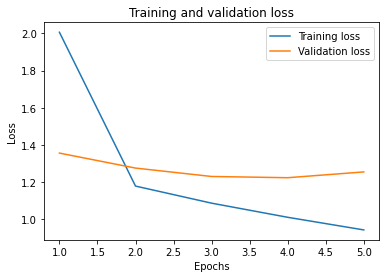

In [ ]:
# Plot the result

import matplotlib
from matplotlib import pyplot as plt

# Loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

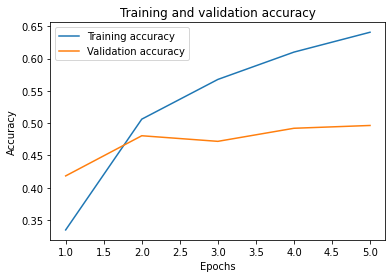

In [ ]:
# Accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.3f}") 
print(f"Test accuracy: {test_acc:.3f}") 

27/27 [==============================] - 15s 540ms/step - loss: 1.1835 - accuracy: 0.5301
Test loss: 1.184
Test accuracy: 0.530


# Target model: Convolutional Neural Network

In [ ]:
collected = gc.collect()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


inputs_cnn = keras.Input(shape=(resized_height, resized_width, 3)) 

x = layers.Conv2D(filters=32, kernel_size=7, activation="relu")(inputs_cnn) #kernel_size = 3*3=9px, without padding
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", kernel_regularizer=regularizers.L2(0.01), padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Dropout(0.5)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer=regularizers.L2(0.005), padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Dropout(0.5)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", kernel_regularizer=regularizers.L2(0.005), padding="same")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Dropout(0.5)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

# before passing output of conv layer to Dense layer we need to convert it to the vector
flatten = layers.Flatten()(x) 
outputs_cnn = layers.Dense(5, activation="softmax")(flatten) # 5 as 5 categories

# Connect the input and output in the model class
model_cnn = keras.Model(inputs=inputs_cnn, outputs=outputs_cnn)

In [ ]:
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 76, 102, 3)]      0         
                                                                 
 conv2d (Conv2D)             (None, 70, 96, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 70, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 48, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 24, 32)       0     

In [ ]:
#early stopping and model checkpoint
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5, #stop if model doesnt improve accuracy for 5 epochs
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True, # save model when val_loss is the best
    )
]

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model_cnn.fit(
    X_train, 
    Y_train, 
    callbacks=callbacks_list,
    epochs=50,
    validation_data = (X_val, Y_val))

Epoch 1/50
87/87 [==============================] - 67s 760ms/step - loss: 2.6277 - accuracy: 0.2976 - val_loss: 2.2991 - val_accuracy: 0.3575
Epoch 2/50
87/87 [==============================] - 69s 783ms/step - loss: 1.8993 - accuracy: 0.4566 - val_loss: 1.8898 - val_accuracy: 0.4038
Epoch 3/50
87/87 [==============================] - 65s 743ms/step - loss: 1.6125 - accuracy: 0.4819 - val_loss: 1.6683 - val_accuracy: 0.4342
Epoch 4/50
87/87 [==============================] - 64s 734ms/step - loss: 1.4264 - accuracy: 0.5246 - val_loss: 1.5889 - val_accuracy: 0.4226
Epoch 5/50
87/87 [==============================] - 67s 768ms/step - loss: 1.2876 - accuracy: 0.5634 - val_loss: 1.4288 - val_accuracy: 0.4819
Epoch 6/50
87/87 [==============================] - 64s 733ms/step - loss: 1.2147 - accuracy: 0.5829 - val_loss: 1.2698 - val_accuracy: 0.5456
Epoch 7/50
87/87 [==============================] - 66s 762ms/step - loss: 1.1495 - accuracy: 0.5974 - val_loss: 1.2055 - val_accuracy: 0.5789

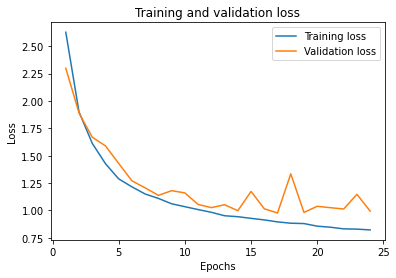

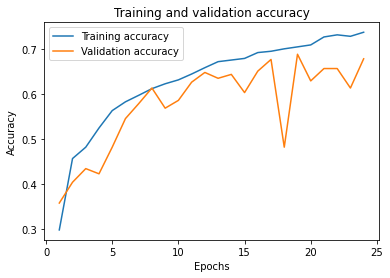

In [ ]:
import matplotlib
from matplotlib import pyplot as plt


# Loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model_cnn.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.3f}") 
print(f"Test accuracy: {test_acc:.3f}")

27/27 [==============================] - 5s 167ms/step - loss: 1.0442 - accuracy: 0.6667
Test loss: 1.044
Test accuracy: 0.667


22/22 [==============================] - 4s 169ms/step


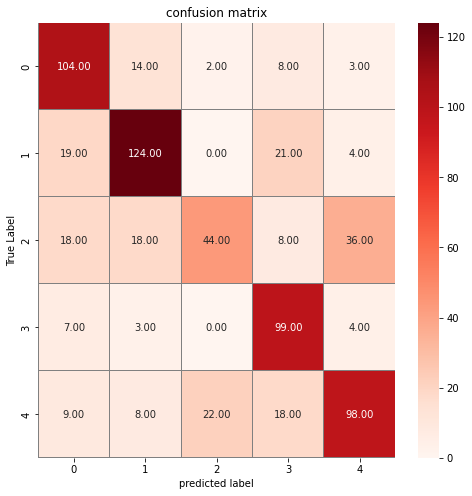

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model_cnn.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize = (8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Reds",
            linecolor = "gray", fmt = ".2f", ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()